# Feature or Dimensionality Reduction - Principle Component Analysis (PCA)

In [53]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Datasets/BostonHousing.csv")

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
X.shape

(506, 13)

In [8]:
X.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
dtype: float64

## Step 1: Standardize the Dataset

In [10]:
X = X - X.mean()  # to make the data mean centric

In [11]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063


## Step 2: Calculate Covariance Matrix

In [14]:
X = X.to_numpy()

In [15]:
S = np.dot(X.T, X)

In [16]:
S.shape

(13, 13)

## Step 3: Eigen Value Decomposition (getting Eigenvalues and Eigenvectors)

In [17]:
eigenvalues, eigenvectors = np.linalg.eig(S)

In [18]:
eigenvalues

array([1.55994052e+07, 3.15641668e+06, 4.13273799e+05, 1.34675843e+05,
       2.51649214e+04, 1.40777807e+04, 8.11200987e+03, 4.81129544e+03,
       1.65303258e+03, 5.96375614e+02, 1.28853650e+02, 3.03497195e+01,
       1.54250065e+00])

In [20]:
eigenvectors   # eigenvectors are in columns

array([[ 2.92973218e-02,  6.66847277e-03,  1.14793645e-02,
         2.71309632e-02,  9.52338065e-01, -1.69050862e-01,
        -2.16220534e-01, -1.24410586e-01,  1.37713177e-02,
         1.66179883e-02,  1.99666297e-03,  1.99499182e-03,
        -5.12974614e-04],
       [-4.35898000e-02,  1.17564821e-03, -6.32897481e-01,
         7.68058991e-01, -5.67213995e-03,  4.68215380e-02,
        -3.51598379e-02,  5.13731838e-02,  2.35075239e-02,
        -3.06891846e-02, -5.51190327e-03, -1.93735139e-04,
        -1.27249747e-04],
       [ 2.83309382e-02, -4.94975624e-03,  8.83403603e-02,
        -1.28007210e-02, -5.71048624e-02,  3.43651593e-01,
        -7.85948681e-01,  4.90776545e-01,  3.52993231e-02,
         9.80914287e-02,  1.78544855e-02, -8.11846520e-03,
         4.24115064e-03],
       [-5.55846350e-05, -1.02678850e-04,  9.75320360e-04,
         8.54389584e-04, -2.16905859e-03, -3.50007555e-03,
        -5.10632892e-03,  1.13540624e-02, -1.78071403e-02,
        -1.57944414e-03,  1.59115209e

In [22]:
eigenvectors[:, 0] # eigen vector 1

array([ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02, -5.55846350e-05,
        4.49721818e-04, -1.16815860e-03,  8.36335746e-02, -6.56163360e-03,
        4.50053753e-02,  9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
        2.29433756e-02])

In [23]:
eigenvectors[:, 1] # eigen vector 2

array([ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03, -1.02678850e-04,
        1.82069867e-06,  3.65750108e-04, -5.72246652e-03,  3.53685109e-04,
       -8.61865948e-03, -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
        5.76719865e-03])

In [26]:
top_3_features = eigenvectors[:, :3]
top_3_features

array([[ 2.92973218e-02,  6.66847277e-03,  1.14793645e-02],
       [-4.35898000e-02,  1.17564821e-03, -6.32897481e-01],
       [ 2.83309382e-02, -4.94975624e-03,  8.83403603e-02],
       [-5.55846350e-05, -1.02678850e-04,  9.75320360e-04],
       [ 4.49721818e-04,  1.82069867e-06,  1.80720215e-03],
       [-1.16815860e-03,  3.65750108e-04, -4.73397110e-03],
       [ 8.36335746e-02, -5.72246652e-03,  7.55863075e-01],
       [-6.56163360e-03,  3.53685109e-04, -4.50884160e-02],
       [ 4.50053753e-02, -8.61865948e-03, -2.84787088e-03],
       [ 9.49741169e-01, -2.92406308e-01, -9.38644477e-02],
       [ 5.60011721e-03, -2.52898538e-03,  1.11592649e-02],
       [-2.91218514e-01, -9.56180551e-01,  2.35628231e-02],
       [ 2.29433756e-02,  5.76719865e-03,  9.28333004e-02]])

In [50]:
explained_variance = np.round((eigenvalues/sum(eigenvalues))*100,1)
explained_variance

array([80.6, 16.3,  2.1,  0.7,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ])

In [52]:
cumulative_explained_variance = np.cumsum(explained_variance)
cumulative_explained_variance

array([80.6, 96.9, 99. , 99.7, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9])

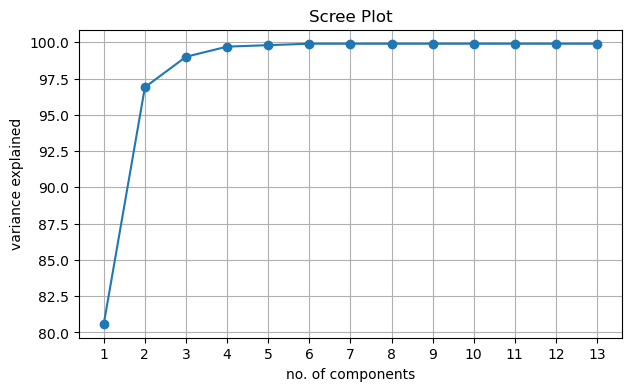

In [65]:
plt.figure(figsize = (7,4))
plt.plot(range(1,len(cumulative_explained_variance)+1), cumulative_explained_variance, marker ="o")
plt.xticks(range(1,len(cumulative_explained_variance)+1))
plt.title("Scree Plot")
plt.xlabel('no. of components')
plt.ylabel('variance explained')
plt.grid("on")
plt.show()

## Step 4: Projection

In [27]:
X.shape

(506, 13)

In [28]:
top_3_features.shape

(13, 3)

In [31]:
new_features = np.dot(X, top_3_features)
new_features

array([[-119.81884272,   -5.56005586,    3.17269264],
       [-168.89015548,   10.11620863,   30.78188677],
       [-169.31170747,   14.0805323 ,   16.75362821],
       ...,
       [-138.38716306,    0.9380922 ,   37.28518133],
       [-137.50517338,    4.2518251 ,   35.98834188],
       [-139.19033295,    1.00906423,   29.77243231]])

## PCA from sklearn library

In [33]:
p_components = PCA(n_components=3)

In [34]:
X = data.iloc[:, :-1]

In [35]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [36]:
p_components.fit_transform(X)

array([[-119.81884272,   -5.56005586,   -3.17269264],
       [-168.89015548,   10.11620863,  -30.78188677],
       [-169.31170747,   14.0805323 ,  -16.75362821],
       ...,
       [-138.38716306,    0.9380922 ,  -37.28518133],
       [-137.50517338,    4.2518251 ,  -35.98834188],
       [-139.19033295,    1.00906423,  -29.77243231]])

In [37]:
p_components.explained_variance_   # each vector explains this much variance (magnitude)

array([30889.91126082,  6250.3300614 ,   818.3639584 ])

In [38]:
p_components.explained_variance_ratio_    # each vector explains this much variance (percentage)

array([0.80582318, 0.16305197, 0.02134861])

In [39]:
p_components.explained_variance_ratio_.sum()

0.990223752166969